# 3 Exploratory Data Analysis

## 3.1 Introduction:
The dataset had some missing values in real data for CO, NOX, NO2 and non-methanic hydrocarbons. We wiil going to explore more data in this notebook and understand if other parameters like humidity and temperature can affect the relationship between sensor and real data.

## 3.2 Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 3.3 Load the data

In [2]:
# load data
df=pd.read_csv('Desktop/Springboard/Capstone 2/H.csv', parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             9357 non-null   object 
 1   Time                             9357 non-null   object 
 2   CO_Real                          7674 non-null   float64
 3   CO_Sensor                        8991 non-null   float64
 4   Non Metanic Hydrocarbons_Real    914 non-null    float64
 5   Benzene_Real                     8991 non-null   float64
 6   Non Metanic Hydrocarbons_Sensor  8991 non-null   float64
 7   NOX_Real                         7718 non-null   float64
 8   NOX_Sensor                       8991 non-null   float64
 9   NO2_Real                         7715 non-null   float64
 10  NO2_Sensor                       8991 non-null   float64
 11  O3_Sensor                        8991 non-null   float64
 12  Temperature         

In [4]:
df.head()

,Date,Time,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity,CO_level
0,2004-11-23,19:00:00,11.9,2008.0,NaN,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High
1,2004-11-23,20:00:00,11.5,1918.0,NaN,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High
2,2004-11-17,18:00:00,10.2,1802.0,NaN,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High
3,2004-11-23,18:00:00,10.2,1982.0,NaN,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High
4,2004-11-26,18:00:00,10.1,1956.0,NaN,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High


In [5]:
df.describe()

,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## 3.4 Investigate linear relationship between parameters

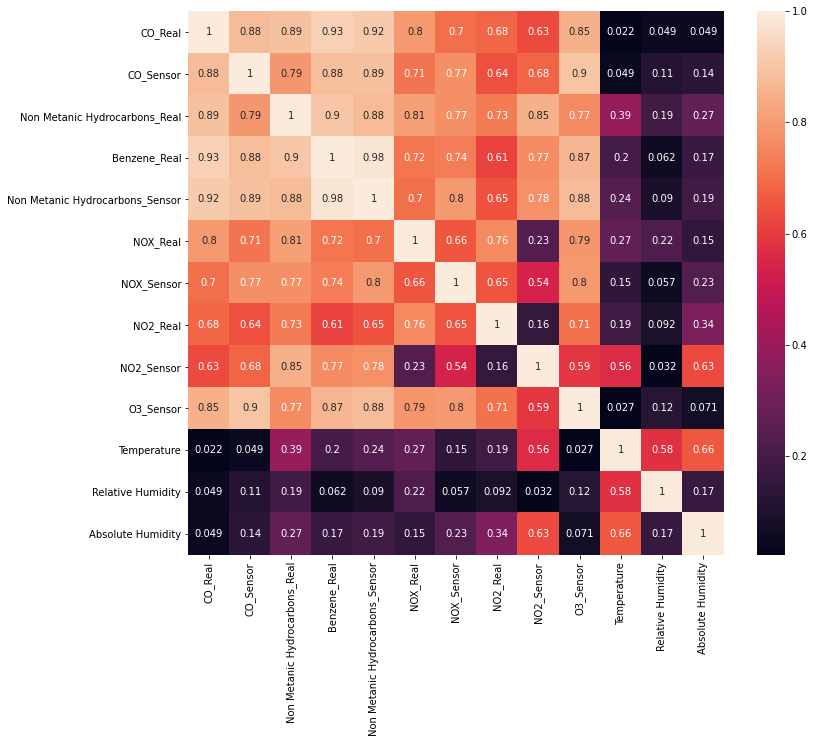

In [6]:
# Finding correlation between parameters in the heatmap
plt.subplots(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True);

All polutions have strong correlations with eachother. The NO2 and NOX have week linear correlations in sensor amounts.NO2 sensor seems to have correlation with absolute humidity and temperature.

## 3.5 Group data by Date

In [7]:
# Convert date to datetime format
df['Date']=pd.to_datetime(df['Date'])
df_notime=df.drop(['Time'],axis=1)

In [8]:
# Daily average data
df_daily=df_notime.groupby('Date').mean()
df_daily.head()

,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity
Date,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,2.239130,1244.166667,104.500000,7.979167,851.958333,144.391304,1277.250000,99.869565,1522.833333,885.250000,9.837500,64.075000,0.775767
2004-03-12,2.804545,1281.666667,156.347826,12.129167,1008.291667,173.727273,1101.875000,116.272727,1627.291667,1084.375000,11.287500,51.095833,0.663104
2004-03-13,2.695652,1330.666667,139.250000,10.916667,992.833333,184.434783,993.208333,118.869565,1595.791667,1245.916667,12.866667,51.533333,0.732296
2004-03-14,2.469565,1361.125000,116.958333,9.637500,943.916667,146.608696,1001.291667,110.391304,1602.375000,1234.208333,16.012500,48.850000,0.849671


In [9]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 391 entries, 2004-03-10 to 2005-04-04
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CO_Real                          355 non-null    float64
 1   CO_Sensor                        383 non-null    float64
 2   Non Metanic Hydrocarbons_Real    44 non-null     float64
 3   Benzene_Real                     383 non-null    float64
 4   Non Metanic Hydrocarbons_Sensor  383 non-null    float64
 5   NOX_Real                         357 non-null    float64
 6   NOX_Sensor                       383 non-null    float64
 7   NO2_Real                         357 non-null    float64
 8   NO2_Sensor                       383 non-null    float64
 9   O3_Sensor                        383 non-null    float64
 10  Temperature                      383 non-null    float64
 11  Relative Humidity                383 non-null    float64
 12  Abs

## 3.6 Understand measurements based on date & time

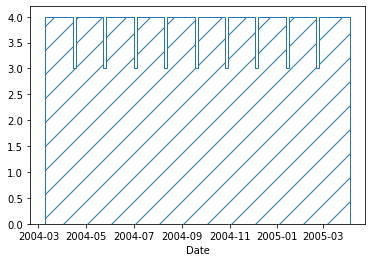

In [10]:
plt.hist(df_daily.index, histtype='step',linewidth=1, facecolor='c', hatch='/', bins=100);
plt.xlabel('Date');

In [11]:
df['week_day'] = df.Date.dt.dayofweek
df.head()

,Date,Time,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity,CO_level,week_day
0,2004-11-23,19:00:00,11.9,2008.0,NaN,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High,1
1,2004-11-23,20:00:00,11.5,1918.0,NaN,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High,1
2,2004-11-17,18:00:00,10.2,1802.0,NaN,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High,2
3,2004-11-23,18:00:00,10.2,1982.0,NaN,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High,1
4,2004-11-26,18:00:00,10.1,1956.0,NaN,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High,4


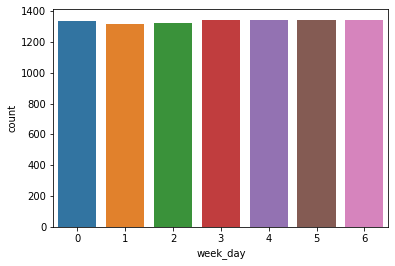

In [12]:
sns.countplot(df.week_day);
plt.xlabel('week_day');

No difference in measurement observed based on the week days. The week days start on Monday(0) and finish on Sunday(6).

## 3.7 Pollutions measurements based on weekdays and weekends

In [13]:
new=df.sort_values(by=['week_day'])


In general less pollution observed in the weekends vs. weekdays. Let's see pollutions distributions more closely in the box plot.

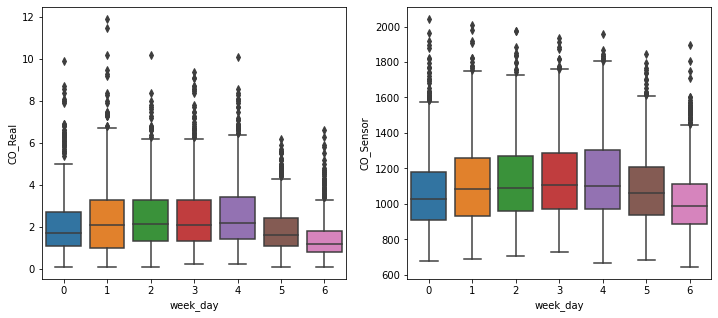

In [14]:
f, axes = plt.subplots(1, 2,figsize=(12,5))

sns.boxplot(  y="CO_Real", x= 'week_day', data=new,  orient='v' , ax=axes[0])
sns.boxplot(  y='CO_Sensor', x= 'week_day', data=new,  orient='v' , ax=axes[1]);

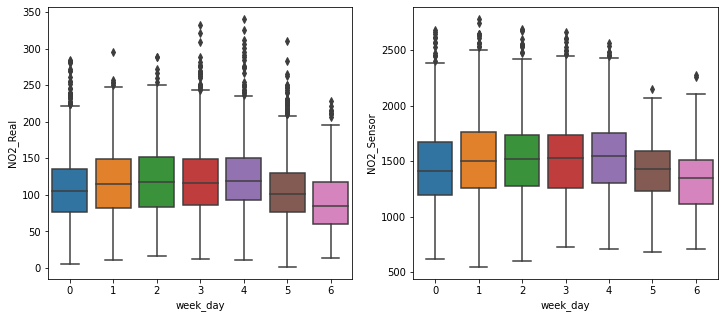

In [15]:
f, axes = plt.subplots(1, 2,figsize=(12,5))

sns.boxplot(  y="NO2_Real", x= 'week_day', data=new,  orient='v' , ax=axes[0])
sns.boxplot(  y='NO2_Sensor', x= 'week_day', data=new,  orient='v' , ax=axes[1]);

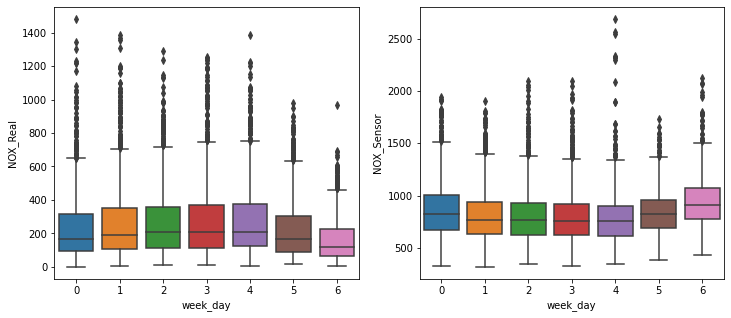

In [16]:
f, axes = plt.subplots(1, 2,figsize=(12,5))

sns.boxplot(  y="NOX_Real", x= 'week_day', data=new,  orient='v' , ax=axes[0])
sns.boxplot(  y='NOX_Sensor', x= 'week_day', data=new,  orient='v' , ax=axes[1]);

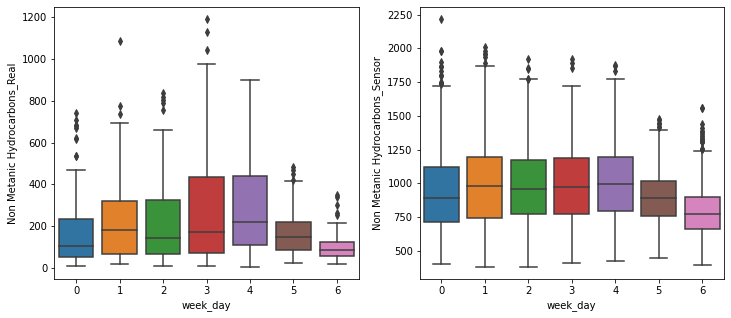

In [17]:
f, axes = plt.subplots(1, 2,figsize=(12,5))

sns.boxplot(  y="Non Metanic Hydrocarbons_Real", x= 'week_day', data=new,  orient='v' , ax=axes[0])
sns.boxplot(  y='Non Metanic Hydrocarbons_Sensor', x= 'week_day', data=new,  orient='v' , ax=axes[1]);

More outliers observed in the NOX data.Also, it seems range of data is higher for NOX data.In all cases, it seems lower polutions observed during the weekends. Now lets see the pollution distribution in different dates.

## 3.8 Pollutions changes based on the time

In [18]:
#weekly average data
def time_plot (df,col1,col2):
    fig, axes = plt.subplots(2,1, figsize=(18,20))
    axes[0].plot(df[col1])
    axes[0].set_title (col1)

    axes[1].plot(df[col2])
    axes[1].set_title (col2)

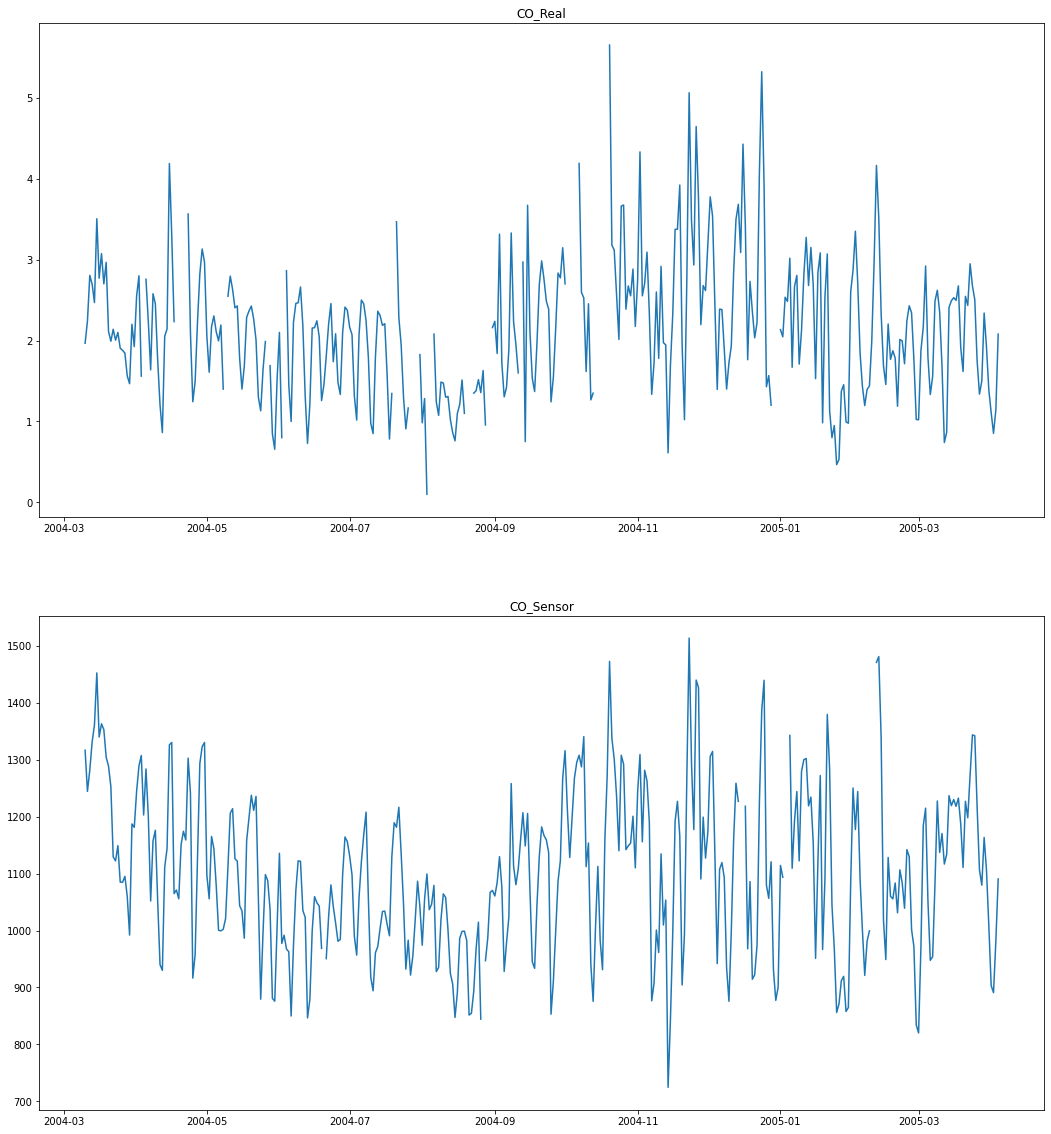

In [19]:
time_plot(df_daily,'CO_Real','CO_Sensor')

Some missing data observed in the CO_real mostly in August and October in 2004. Less Missing data was in sensor data in February 2005. Also higher levels of CO observed in the real data in October.Low levels of CO are mostly in the August.

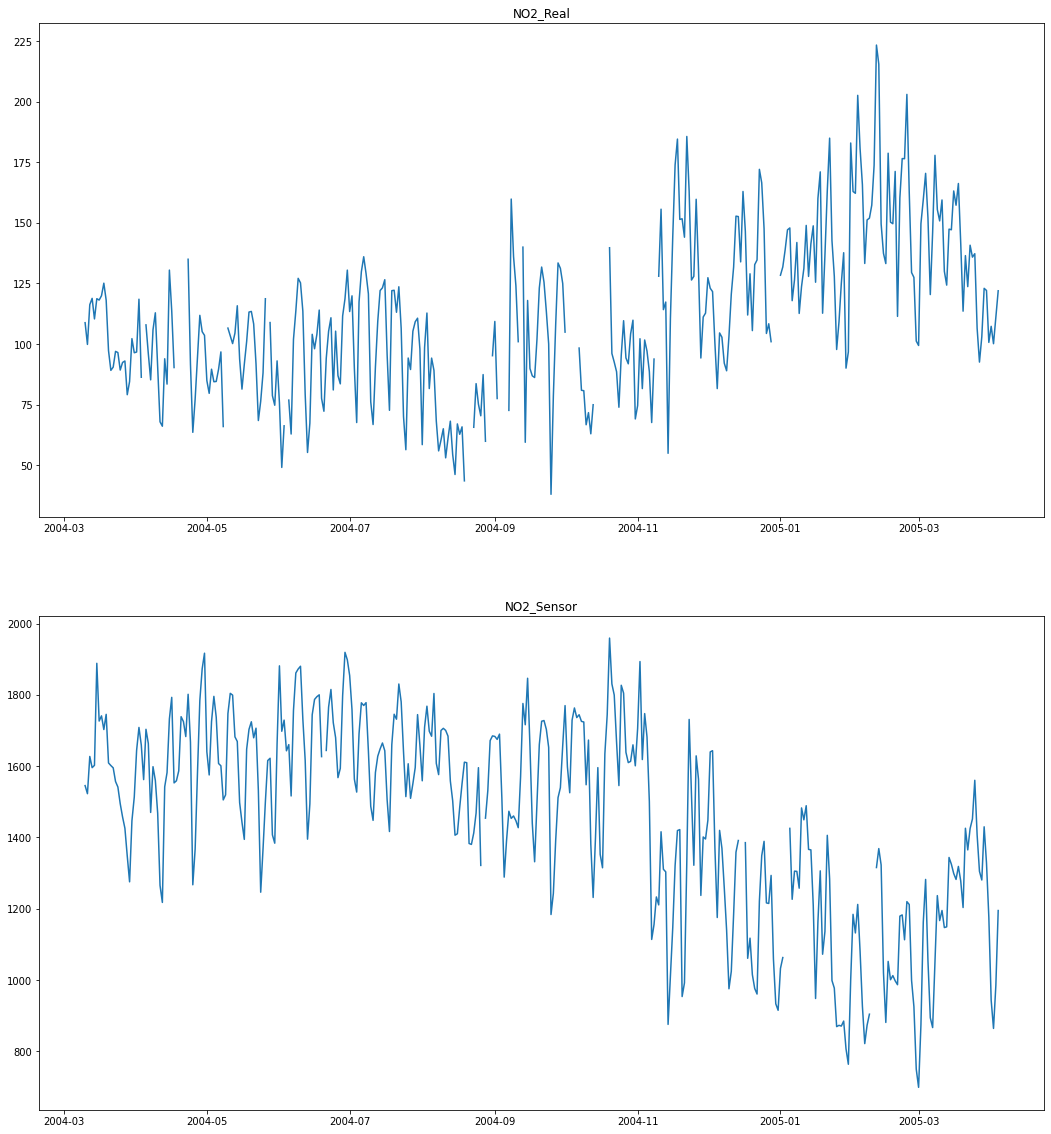

In [20]:
time_plot(df_daily,'NO2_Real','NO2_Sensor')

Some missing data observed in the NO2_real mostly in October in 2004. Less Missing data was in sensor data in February 2005. Also higher levels of NO2 observed in the real data in October.Low levels of NO2 are mostly in the September. 

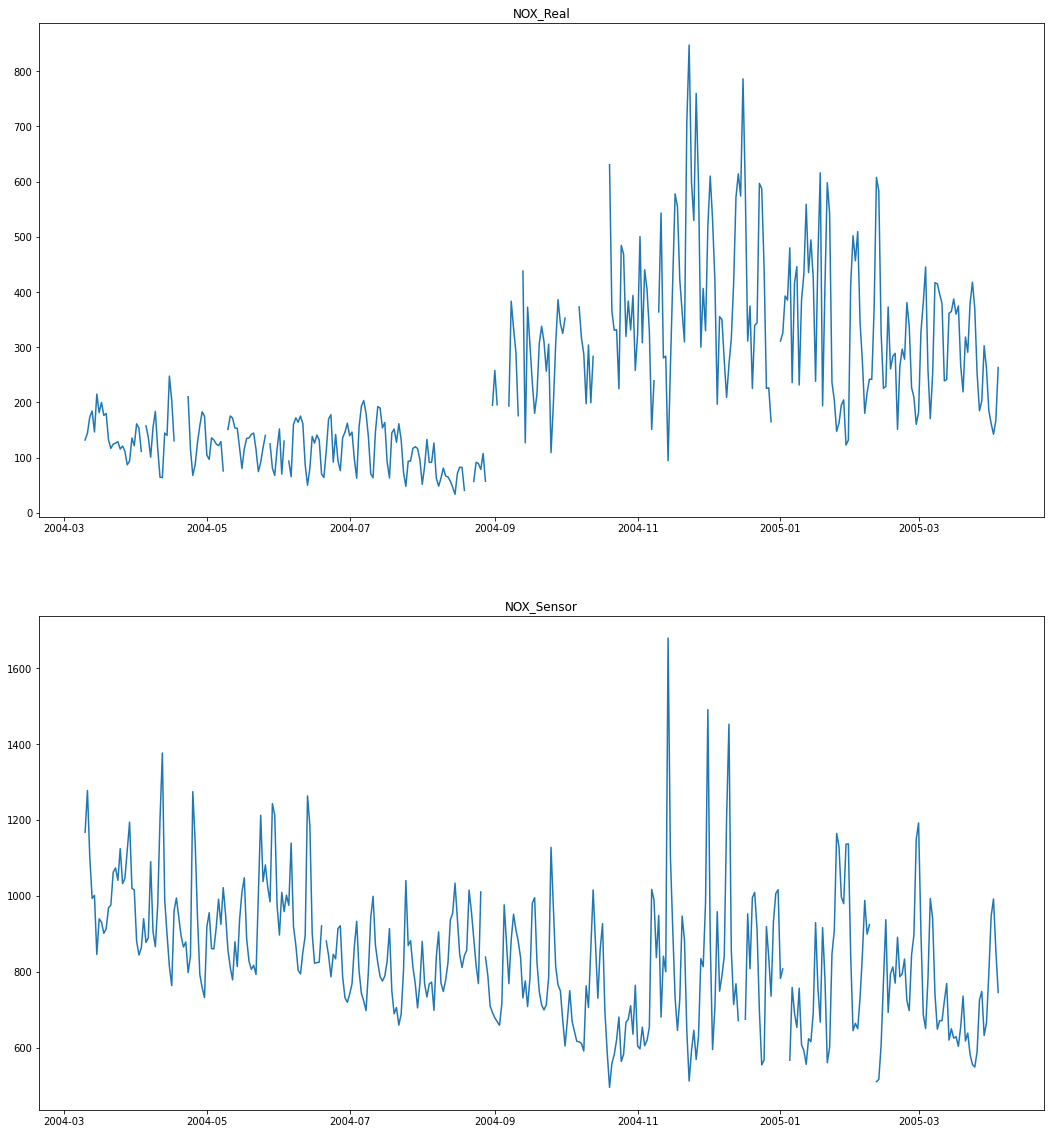

In [21]:
time_plot(df_daily,'NOX_Real','NOX_Sensor')

Wierd trend observed in the real data for NOX before september. Low levels of NOX observed before september while the NOX levels increased alot after September. The sensor data did not show this trend. Could this diffrence happened in real data because of problem in measurement device? 

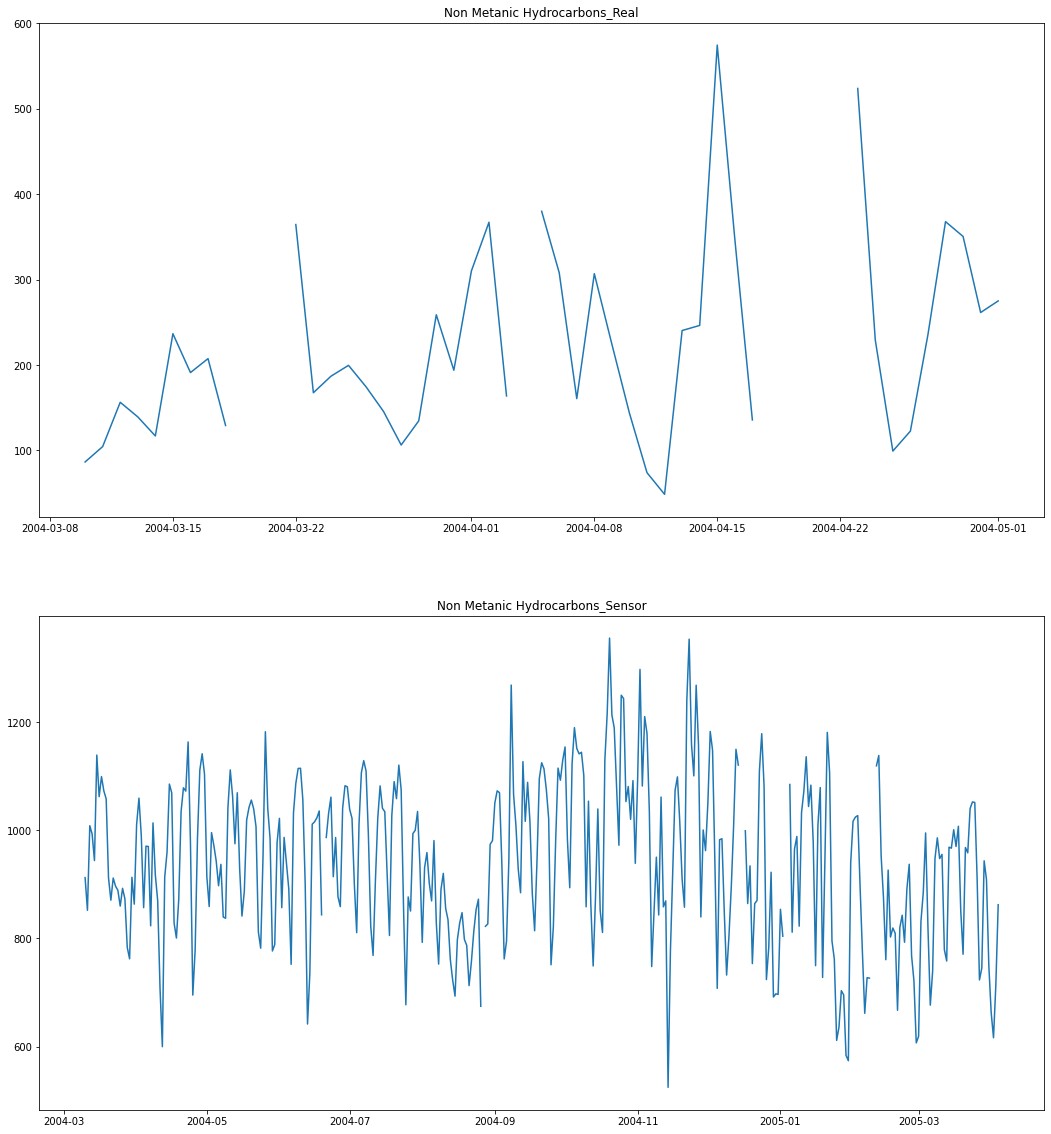

In [22]:
time_plot(df_daily,'Non Metanic Hydrocarbons_Real','Non Metanic Hydrocarbons_Sensor')

There are alot of missing data in real non-methanic hydrocarbons. It seems the measurement device stopped working after May-2004.Also , there are missing data even in March and April.

## 3.9 CO_Real vs. sensor data in linear regression

In [23]:
df_CO=df[['CO_Real','CO_Sensor','Temperature','Absolute Humidity']]
df_CO=df_CO.dropna()


In [24]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_CO['CO_Real'],df_CO['CO_Sensor'])
print(slope, intercept, r_value, p_value, std_err)

133.85851326837962 825.5007539998068 0.8792883410762686 0.0 0.8462112821329771


In [25]:
df_CO['CO_Predict']=slope*df_CO['CO_Real']+intercept
df_CO['resid']=abs(df_CO['CO_Predict']-df_CO['CO_Sensor'])

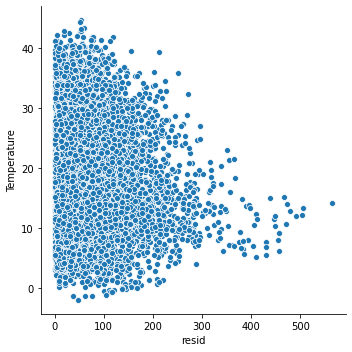

In [26]:
sns.relplot(data=df_CO, x="resid", y="Temperature");

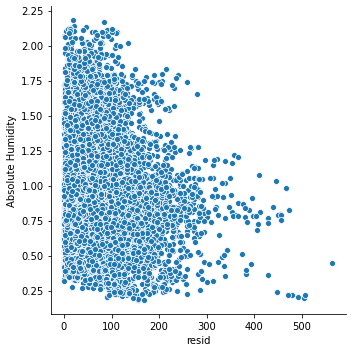

In [27]:
sns.relplot(data=df_CO, x="resid", y="Absolute Humidity");

It doesn't look like temperature and humidity affect the sensor relationship with real data. Although higher residuals in the linear regression observed in the low range of temperature and humidity.

## 3.10 Real data vs sensor data for NO2,NOX and non-methanic hydrocarbons

Now let's see if temperature and humidity can affect relationship between sensor and real data.I used quartile to see effects of temperature and humidity.

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


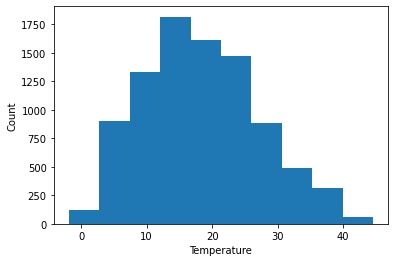

In [28]:
plt.hist(df['Temperature']);
plt.xlabel('Temperature')
plt.ylabel('Count');

In [29]:
df['T_quartile']=pd.qcut(df['Temperature'],q=4, precision=1)
df['T_quartile'].value_counts()

(11.8, 17.8]    2272
(-2.0, 11.8]    2268
(24.4, 44.6]    2232
(17.8, 24.4]    2219
Name: T_quartile, dtype: int64

In [30]:
df['H_quartile']=pd.qcut(df['Absolute Humidity'], q=4, precision=1)
df['H_quartile'].value_counts()

(1.3, 2.2]    2248
(0.7, 1.0]    2248
(0.1, 0.7]    2248
(1.0, 1.3]    2247
Name: H_quartile, dtype: int64

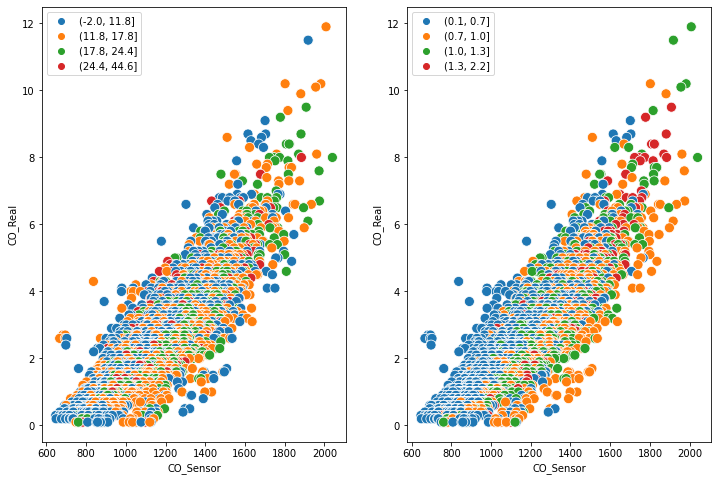

In [55]:
f, axes = plt.subplots(1, 2,figsize=(12,8))
sns.scatterplot(data=df, x="CO_Sensor", y="CO_Real", hue=df['T_quartile'].to_list(),s=100, ax=axes[0], hue_order=df['T_quartile'].cat.categories);

sns.scatterplot(data=df, x="CO_Sensor", y="CO_Real", hue=df['H_quartile'].to_list(),s=100, ax=axes[1], hue_order=df['H_quartile'].cat.categories);


There might be some effects of temperature and humidity on the deviation from linear relationship between sensor and real data for CO.

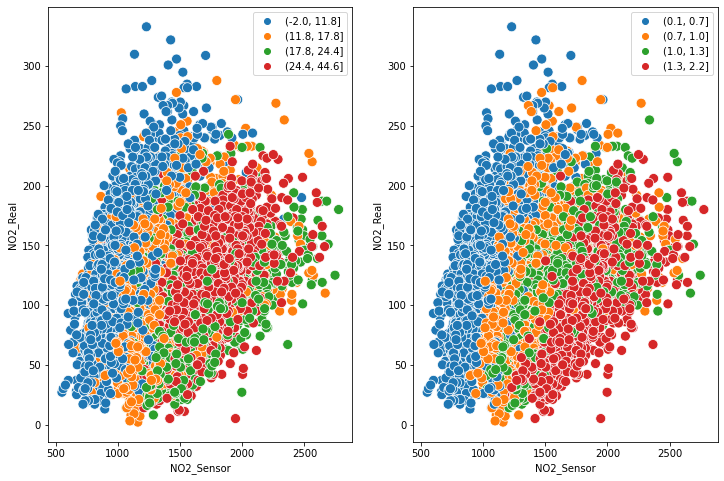

In [50]:
f, axes = plt.subplots(1, 2,figsize=(12,8))
sns.scatterplot(data=df, x="NO2_Sensor", y="NO2_Real", hue=df['T_quartile'].to_list(),s=100, ax=axes[0], hue_order=df['T_quartile'].cat.categories);
sns.scatterplot(data=df, x="NO2_Sensor", y="NO2_Real", hue=df['H_quartile'].to_list(),s=100, ax=axes[1], hue_order=df['H_quartile'].cat.categories);


It's hard to understand if there is any correlation between sensor and real data for NO2. The humidity and temperature effects are also hard to understand.

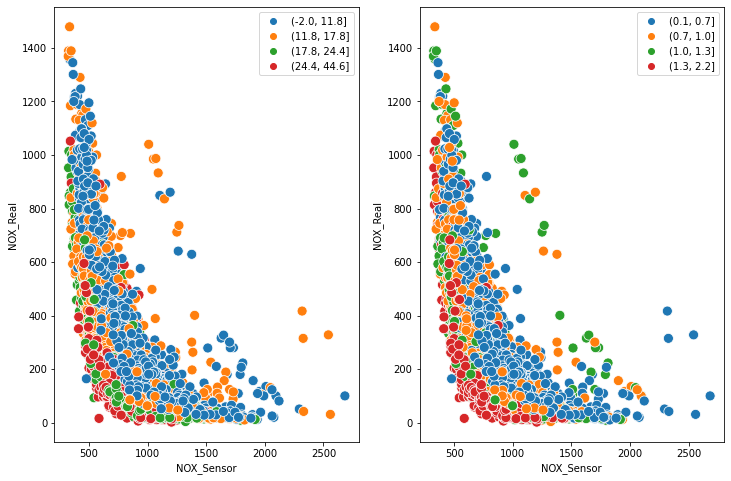

In [49]:
f, axes = plt.subplots(1, 2,figsize=(12,8))
sns.scatterplot(data=df, x="NOX_Sensor", y="NOX_Real", hue=df['T_quartile'].to_list(),s=100, ax=axes[0],hue_order=df['T_quartile'].cat.categories);
sns.scatterplot(data=df, x="NOX_Sensor", y="NOX_Real", hue=df['H_quartile'].to_list(),s=100, ax=axes[1], hue_order=df['H_quartile'].cat.categories);


For NOx, we can say in temperatures between -2-20 and low humidity ranges, a few deviations were observed.

<AxesSubplot:xlabel='Non Metanic Hydrocarbons_Sensor', ylabel='Non Metanic Hydrocarbons_Real'>

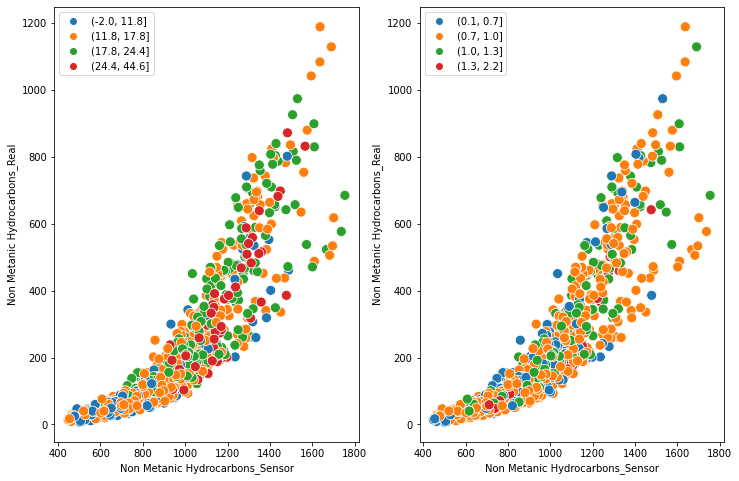

In [48]:
f, axes = plt.subplots(1, 2,figsize=(12,8))
sns.scatterplot(data=df, x="Non Metanic Hydrocarbons_Sensor", y="Non Metanic Hydrocarbons_Real", hue=df['T_quartile'].to_list(),hue_order=df['T_quartile'].cat.categories,s=100, ax=axes[0]);
sns.scatterplot(data=df, x="Non Metanic Hydrocarbons_Sensor", y="Non Metanic Hydrocarbons_Real", hue=df['H_quartile'].to_list(),hue_order=df['H_quartile'].cat.categories,s=100, ax=axes[1]);



No measurement observed in high temperature and humidity for non methanic hydrocarbons.Most of data are in the range of T=10-20 and humidity=0.6-1.2.

More outliers observed in temperatures between 10-20 and absolute humidity of 0.6-1.2.

Although, CO sensor and CO real amounts seems to move together, it doeas not look like NO2 and NOX sensor and real amounts are moving together. Another interesting observation is low pollution in 2004-09 in real amounts.


## 3.11 Non Metanic Hydrocarbons_real vs. sensor data in logarithmic transformation & regression

In [35]:
df_NMH=df[['Non Metanic Hydrocarbons_Real','Non Metanic Hydrocarbons_Sensor','Temperature','Absolute Humidity']]
df_NMH=df_NMH.dropna()

In [36]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(df_NMH['Non Metanic Hydrocarbons_Real']),df_NMH['Non Metanic Hydrocarbons_Sensor'])
print(slope, intercept, r_value, p_value, std_err)

256.6445314328944 -325.60569274211934 0.9312419066384983 0.0 3.3758109622036065


It looks like by log-transformation of real data for non-methanic hydrocarbons, we can predict sensor data. The r-value for the regression between ln(real_data) and sensor data is 0.93.

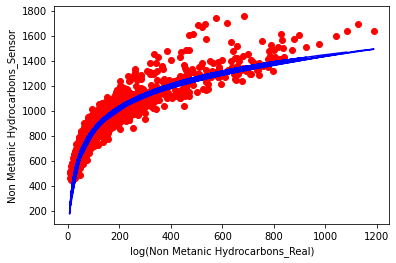

In [37]:
plt.scatter(df_NMH['Non Metanic Hydrocarbons_Real'],df_NMH['Non Metanic Hydrocarbons_Sensor'], color='red')
plt.plot(df_NMH['Non Metanic Hydrocarbons_Real'], slope*np.log(df_NMH['Non Metanic Hydrocarbons_Real'])+intercept, color='blue')
plt.xlabel('log(Non Metanic Hydrocarbons_Real)')
plt.ylabel('Non Metanic Hydrocarbons_Sensor');


## 3.12 Summary:

Data exploration showed some correlation between NO2 sensor and temperature and humidity in the heatmap. Additional exploration showed that lower range of temperature and humidity can affect the relationship between sensor and real data for pollutions but it's hard to get good conclusion. We will understand this better in the modeling part. Also, it seems the pollutions are less in weekend in comparison to weekdays. Another interesting point was low ranges of NOX before september and increasing them after that. Also, non-methanic hydrocarbon real measurement device seemed to stopp working after few months.

More exploration also showed strong linear correlation between CO_Real and CO_Sensor and strong linear correlation between log(Non Methanic Hydrocarbons_Real) and Non Methanic Hydrocarbon_Sensor.No linear regression observed even after log-transform in NOX or NO2 data.In the modeling part, I will add humidity and temperature data for predicting sensor data from real data in different pollutions and will try different algorithms.